This notebook explores the Austin's lobbyist registration dataset, after the city's 2017 expansion of the range of lobbyist data it publishes and changes to the format of the data tables.

In [1]:
import pandas as pd

df = pd.read_csv("../data/Lobbyist_-_Clients.csv")

In [2]:
df = df.sort_values("CLIENT_LAST_NAME")

In [3]:
date = pd.read_csv("../data/Lobbyist_-_Reports.csv")

In [4]:
dates = pd.merge(df, date[["REPORT_ID","REPORT_DATE"]], how='left', on="REPORT_ID")

In [5]:
dates

,CLIENT_ID,REPORT_ID,REGISTRANT_ID,CLIENTENTITY_CD,CLIENT_TITLE,CLIENT_FIRST_NAME,CLIENT_MI,CLIENT_LAST_NAME,CLIENT_SUFFIX,CLIENT_ADR1,CLIENT_ADR2,CLIENT_CITY,CLIENT_STATE,CLIENT_ZIP,BUSINESS_DESC,COMP_CATEGORY,COMP_EXACT_AMOUNT,COMP_COMMENT,Row_ID,REPORT_DATE
0,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",Suite 236,Miramar Beach,FL,32550,Property Owner,NaN,NaN,NaN,R20170901095457-C0040,08/30/2017
1,C0040,R20171031124151,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",Suite 236,Miramar Beach,FL,32550,Property Owner,NaN,NaN,NaN,R20171031124151-C0040,10/16/2017
2,C0036,R20171130160530,RG0132,Entity,NaN,NaN,NaN,"183 BLW, LP",NaN,PO BOX 9190,NaN,AUSTIN,TX,78766,REAL ESTATE INVESTMENT/ DEVELOPMENT,NaN,NaN,NaN,R20171130160530-C0036,11/20/2017
3,C0036,R20180221105850,RG0142,Entity,NaN,NaN,NaN,"183 BLW, LP",NaN,PO BOX 9190,NaN,AUSTIN,TX,78766,REAL ESTATE INVESTMENT/ DEVELOPMENT,NaN,NaN,NaN,R20180221105850-C0036,02/20/2018
4,C0036,R20171122113731,RG0018,Entity,NaN,NaN,NaN,"183 BLW, LP",NaN,PO BOX 9190,NaN,AUSTIN,TX,78766,REAL ESTATE INVESTMENT/ DEVELOPMENT,NaN,NaN,NaN,R20171122113731-C0036,11/07/2017
5,C0036,R20171115161738,RG0070,Entity,NaN,NaN,NaN,"183 BLW, LP",NaN,PO BOX 9190,NaN,AUSTIN,TX,78766,REAL ESTATE INVESTMENT/ DEVELOPMENT,NaN,NaN,NaN,R20171115161738-C0036,11/07/2017
6,C0036,R20171115142049,RG0065,Entity,NaN,NaN,NaN,"183 BLW, LP",NaN,PO BOX 9190,NaN,AUSTIN,TX,78766,REAL ESTATE INVESTMENT/ DEVELOPMENT,NaN,NaN,NaN,R20171115142049-C0036,11/07/2017
7,C0036,R20171113152000,RG0061,Entity,NaN,NaN,NaN,"183 BLW, LP",NaN,PO BOX 9190,NaN,AUSTIN,TX,78766,REAL ESTATE INVESTMENT/ DEVELOPMENT,NaN,NaN,NaN,R20171113152000-C0036,11/07/2017
8,C0036,R20171122114728,RG0057,Entity,NaN,NaN,NaN,"183 BLW, LP",NaN,PO BOX 9190,NaN,AUSTIN,TX,78766,REAL ESTATE INVESTMENT/ DEVELOPMENT,NaN,NaN,NaN,R20171122114728-C0036,11/07/2017
9,C0041,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"2208 Lake Austin, LLC",NaN,2208 Lake Austin Blvd.,NaN,Austin,TX,78703,Property Owner,NaN,NaN,NaN,R20170901095457-C0041,08/30/2017


In [6]:
mq = pd.read_csv("../data/Lobbyist_-_Municipal_Questions.csv")

In [7]:
mq[:5]

,REPORT_ID,MQ_ID,REGISTRANT_ID,MQ_DESC,RP_YN,SM_OTHER_DESC,Row_ID
0,R20170703170748,Q0001,RG0017,"Wage, health, and safety standards for Austin'...",N,NaN,R20170703170748-Q0001
1,R20170703190233,Q0001,RG0097,"Convention & Tourism Issues (Promotion, Sales ...",N,NaN,R20170703190233-Q0001
2,R20170718142458,Q0006,RG0101,Traffic Impact Analysis,Y,NaN,R20170718142458-Q0006
3,R20170718150200,Q0001,RG0039,"Lobbying on behalf of Argyle Residential, LLC ...",Y,NaN,R20170718150200-Q0001
4,R20170731114209,Q0019,RG0061,ENTITLEMENTS RELATED TO LAND DEVELOPMENT,Y,NaN,R20170731114209-Q0019


In [8]:
# Linking the clients to the questions they lobbied on

dq = pd.merge(dates, mq, how='left', on=["REPORT_ID","REGISTRANT_ID"])

In [9]:
# Adding new column for a beneficiary of lobbying who isn't the client of the lobbyist

dq["BENEFICIARY"] = dq["MQ_DESC"].str.extract('Lobbying on behalf of (.+) regarding (?:.+)', expand=False)

# Shortening some answers from the form

dq["TOPIC"] = dq["MQ_DESC"].str.extract('Lobbying on behalf of (?:.+) regarding (?:various )?(.+)(?: issues.)', expand=False)
dq["TOPIC"] = dq["TOPIC"].fillna(dq['MQ_DESC'].str.extract('Lobbying on behalf of (?:.+) regarding (?:various )?(.+)', expand=False))
dq["TOPIC"] = dq['TOPIC'].fillna(dq['MQ_DESC']).str.strip(".")
dq['MQ_DESC'] = dq['TOPIC'].apply(lambda x: x.replace("Entitlements related to ", "").replace("ENTITLEMENTS RELATED TO ", ""))
dq = dq.drop(columns=['TOPIC'])

In [10]:
dq

,CLIENT_ID,REPORT_ID,REGISTRANT_ID,CLIENTENTITY_CD,CLIENT_TITLE,CLIENT_FIRST_NAME,CLIENT_MI,CLIENT_LAST_NAME,CLIENT_SUFFIX,CLIENT_ADR1,...,COMP_EXACT_AMOUNT,COMP_COMMENT,Row_ID_x,REPORT_DATE,MQ_ID,MQ_DESC,RP_YN,SM_OTHER_DESC,Row_ID_y,BENEFICIARY
0,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0045,land development,N,NaN,R20170901095457-Q0045,"Atlantic Pacific Communities, LLC"
1,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0064,zoning,N,NaN,R20170901095457-Q0064,"LDG Norwood, L.P."
2,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0065,zoning,N,NaN,R20170901095457-Q0065,Andra Liemandt
3,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0066,zoning,N,NaN,R20170901095457-Q0066,Joseph Liemandt
4,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0067,zoning,N,NaN,R20170901095457-Q0067,"Mariposa Real Estate, LLC"
5,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0059,permit,N,NaN,R20170901095457-Q0059,Anthony George
6,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0068,zoning,N,NaN,R20170901095457-Q0068,"McAdams Enterprises, LLC"
7,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0069,land development,N,NaN,R20170901095457-Q0069,Mill Creek Residential Trust
8,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0070,permit/zoning,N,NaN,R20170901095457-Q0070,Lampros Moumouris
9,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0071,zoning,N,NaN,R20170901095457-Q0071,The NRP Group


## Which clients hired the most lobbyists to work on the most issues?

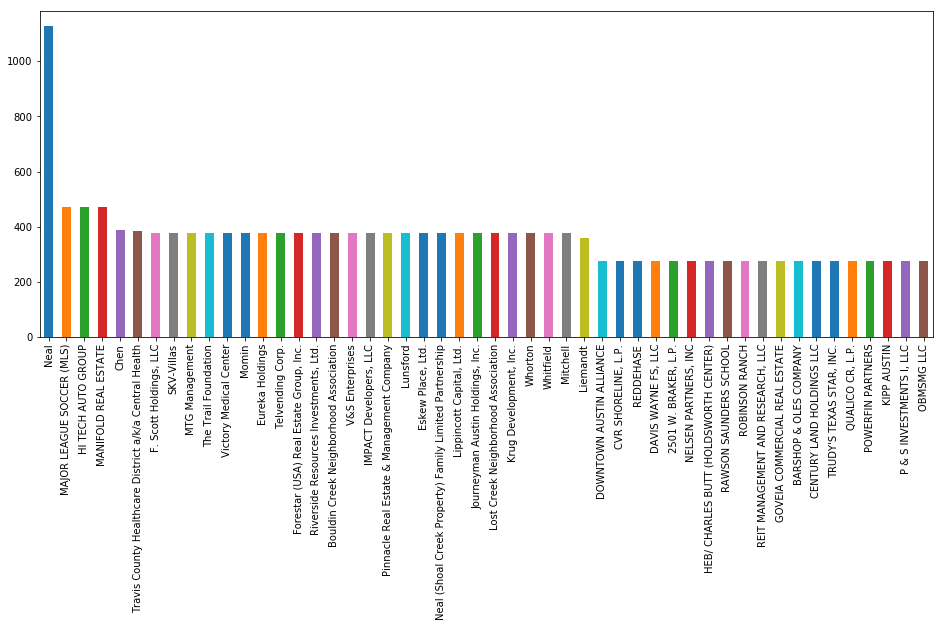

In [11]:
%matplotlib inline
plotDF = dq["CLIENT_LAST_NAME"].value_counts()[:50].plot(kind='bar', figsize=(16,6))

## Who, other than direct clients, had the most lobbying done on their behalf?

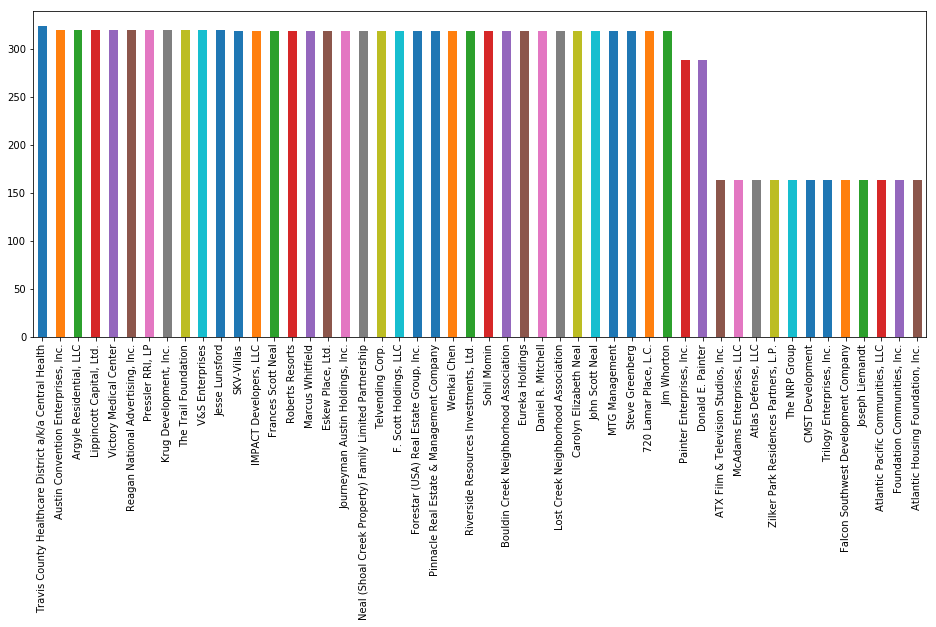

In [12]:
plotDF = dq["BENEFICIARY"].value_counts()[:50].plot(kind='bar', figsize=(16,6))

In [13]:
dq["CLIENT_FULL_NAME"] = dq[['CLIENT_FIRST_NAME', 'CLIENT_LAST_NAME']][dq.CLIENT_FIRST_NAME.notna()]\
    .apply(lambda x: ' '.join(x), axis=1).apply(lambda x: x.strip())
dq["CLIENT_FULL_NAME"][dq.CLIENT_FULL_NAME.isna()] = dq["CLIENT_LAST_NAME"]

/Users/Matt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
dq.CLIENT_FULL_NAME.value_counts()

MANIFOLD REAL ESTATE                                      470
HI TECH AUTO GROUP                                        470
MAJOR LEAGUE SOCCER (MLS)                                 470
Wenkai Chen                                               387
Travis County Healthcare District a/k/a Central Health    383
SKV-Villas                                                376
Carolyn Neal                                              376
Pinnacle Real Estate & Management Company                 376
The Trail Foundation                                      376
F. Scott Holdings, LLC                                    376
V&S Enterprises                                           376
Frances Neal                                              376
Bouldin Creek Neighborhood Association                    376
Jim Whorton                                               376
Daniel Mitchell                                           376
MTG Management                                            376
Eureka H

In [15]:
dq[dq["CLIENT_FULL_NAME"] == "69 Grandview LP"][:5]

,CLIENT_ID,REPORT_ID,REGISTRANT_ID,CLIENTENTITY_CD,CLIENT_TITLE,CLIENT_FIRST_NAME,CLIENT_MI,CLIENT_LAST_NAME,CLIENT_SUFFIX,CLIENT_ADR1,...,COMP_COMMENT,Row_ID_x,REPORT_DATE,MQ_ID,MQ_DESC,RP_YN,SM_OTHER_DESC,Row_ID_y,BENEFICIARY,CLIENT_FULL_NAME
953,C0039,R20170901095457,RG0052,Entity,NaN,NaN,NaN,69 Grandview LP,NaN,8300 North FM 620,...,NaN,R20170901095457-C0039,08/30/2017,Q0045,land development,N,NaN,R20170901095457-Q0045,"Atlantic Pacific Communities, LLC",69 Grandview LP
954,C0039,R20170901095457,RG0052,Entity,NaN,NaN,NaN,69 Grandview LP,NaN,8300 North FM 620,...,NaN,R20170901095457-C0039,08/30/2017,Q0064,zoning,N,NaN,R20170901095457-Q0064,"LDG Norwood, L.P.",69 Grandview LP
955,C0039,R20170901095457,RG0052,Entity,NaN,NaN,NaN,69 Grandview LP,NaN,8300 North FM 620,...,NaN,R20170901095457-C0039,08/30/2017,Q0065,zoning,N,NaN,R20170901095457-Q0065,Andra Liemandt,69 Grandview LP
956,C0039,R20170901095457,RG0052,Entity,NaN,NaN,NaN,69 Grandview LP,NaN,8300 North FM 620,...,NaN,R20170901095457-C0039,08/30/2017,Q0066,zoning,N,NaN,R20170901095457-Q0066,Joseph Liemandt,69 Grandview LP
957,C0039,R20170901095457,RG0052,Entity,NaN,NaN,NaN,69 Grandview LP,NaN,8300 North FM 620,...,NaN,R20170901095457-C0039,08/30/2017,Q0067,zoning,N,NaN,R20170901095457-Q0067,"Mariposa Real Estate, LLC",69 Grandview LP


In [16]:
dq.groupby("CLIENT_FULL_NAME").MQ_DESC.value_counts()

CLIENT_FULL_NAME                       MQ_DESC                                                                                      
1715 G, LLC                            zoning                                                                                           62
                                       land development                                                                                 40
                                       land development/zoning                                                                          17
                                       rezoning of three parcels of land                                                                 6
                                       procurement                                                                                       4
                                       site development                                                                                  4
                                 

In [17]:
dq[["CLIENT_FULL_NAME", "BENEFICIARY"]].apply(pd.Series.value_counts)

,CLIENT_FULL_NAME,BENEFICIARY
"1715 G, LLC",180.0,164.0
"183 BLW, LP",275.0,NaN
"2208 Lake Austin, LLC",180.0,164.0
"2222 CAP. TEXAS, LLC",41.0,NaN
"2501 W. BRAKER, L.P.",275.0,NaN
"6400 Riverside, LLC",2.0,NaN
69 Grandview LP,180.0,164.0
706 Development Corporation,5.0,NaN
"720 Lamar Place, L.C.",254.0,319.0
AECOM,180.0,164.0


In [18]:
dq["BENEFICIARY"].value_counts()[:50]

Travis County Healthcare District a/k/a Central Health    324
Austin Convention Enterprises, Inc.                       320
Argyle Residential, LLC                                   320
Lippincott Capital, Ltd.                                  320
Victory Medical Center                                    320
Reagan National Advertising, Inc.                         320
Pressler RRI, LP                                          320
Krug Development, Inc.                                    320
The Trail Foundation                                      320
V&S Enterprises                                           320
Jesse Lunsford                                            320
SKV-Villas                                                319
IMPACT Developers, LLC                                    319
Frances Scott Neal                                        319
Roberts Resorts                                           319
Marcus Whitfield                                          319
Eskew Pl

In [19]:
# These data tables link preset categories to the subject matter of the lobbying.
# How should that be integrated into a visualization?

kvp = pd.read_csv("../data/Lobbyist_-_Municipal_Question_Subject_Matter_Key-Value_Pairs.csv")
sm = pd.read_csv("../data/Lobbyist_-_Subject_Matter_List.csv")

In [20]:
dq[dq["MQ_ID"]=="Q0001"][:5]

,CLIENT_ID,REPORT_ID,REGISTRANT_ID,CLIENTENTITY_CD,CLIENT_TITLE,CLIENT_FIRST_NAME,CLIENT_MI,CLIENT_LAST_NAME,CLIENT_SUFFIX,CLIENT_ADR1,...,COMP_COMMENT,Row_ID_x,REPORT_DATE,MQ_ID,MQ_DESC,RP_YN,SM_OTHER_DESC,Row_ID_y,BENEFICIARY,CLIENT_FULL_NAME
27,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,R20170901095457-C0040,08/30/2017,Q0001,land development,N,NaN,R20170901095457-Q0001,"720 Lamar Place, L.C.","1715 G, LLC"
92,C0040,R20171031124151,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,R20171031124151-C0040,10/16/2017,Q0001,land development,N,NaN,R20171031124151-Q0001,"720 Lamar Place, L.C.","1715 G, LLC"
183,C0036,R20171130160530,RG0132,Entity,NaN,NaN,NaN,"183 BLW, LP",NaN,PO BOX 9190,...,NaN,R20171130160530-C0036,11/20/2017,Q0001,LAND DEVELOPMENT,Y,NaN,R20171130160530-Q0001,NaN,"183 BLW, LP"
223,C0036,R20180221105850,RG0142,Entity,NaN,NaN,NaN,"183 BLW, LP",NaN,PO BOX 9190,...,NaN,R20180221105850-C0036,02/20/2018,Q0001,LAND DEVELOPMENT,Y,NaN,R20180221105850-Q0001,NaN,"183 BLW, LP"
262,C0036,R20171122113731,RG0018,Entity,NaN,NaN,NaN,"183 BLW, LP",NaN,PO BOX 9190,...,NaN,R20171122113731-C0036,11/07/2017,Q0001,LAND DEVELOPMENT,Y,NaN,R20171122113731-Q0001,NaN,"183 BLW, LP"


In [21]:
sm[:5]

,SM_ID,SM_CATEGORY_DESC,ACTIVE
0,SM_140,Real Estate,Y
1,SM_142,"Rules, Proposed Rules, or Rule Making",Y
2,SM_145,Taxation or Fees,Y
3,SM_15,Annexation,Y
4,SM_150,Technology or Communications,Y


In [22]:
wide = pd.concat([dq,pd.DataFrame(columns=sm["SM_CATEGORY_DESC"].unique())])

In [23]:
wide[:5]

,Accessibility or Persons with Disabilities,Affordability,Animals,Annexation,"Arts, Music, Film, Cultural or Creative Industries",Aviation,BENEFICIARY,BUSINESS_DESC,CLIENTENTITY_CD,CLIENT_ADR1,...,RP_YN,Real Estate,Row_ID_x,Row_ID_y,"Rules, Proposed Rules, or Rule Making",SM_OTHER_DESC,Taxation or Fees,Technology or Communications,Transportation or Mobility,Zoning or Platting
0,NaN,NaN,NaN,NaN,NaN,NaN,"Atlantic Pacific Communities, LLC",Property Owner,Entity,"755 Grand Blvd., B-105",...,N,NaN,R20170901095457-C0040,R20170901095457-Q0045,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,"LDG Norwood, L.P.",Property Owner,Entity,"755 Grand Blvd., B-105",...,N,NaN,R20170901095457-C0040,R20170901095457-Q0064,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Andra Liemandt,Property Owner,Entity,"755 Grand Blvd., B-105",...,N,NaN,R20170901095457-C0040,R20170901095457-Q0065,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,Joseph Liemandt,Property Owner,Entity,"755 Grand Blvd., B-105",...,N,NaN,R20170901095457-C0040,R20170901095457-Q0066,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,"Mariposa Real Estate, LLC",Property Owner,Entity,"755 Grand Blvd., B-105",...,N,NaN,R20170901095457-C0040,R20170901095457-Q0067,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
kvp[:5]

,MQ_ID,REPORT_ID,SM_ID,Row_ID
0,Q0001,R20170707171903,SM_142,R20170707171903-Q0001-SM_142
1,Q0001,R20170707171903,SM_145,R20170707171903-Q0001-SM_145
2,Q0001,R20170707171903,SM_150,R20170707171903-Q0001-SM_150
3,Q0001,R20170707171903,SM_155,R20170707171903-Q0001-SM_155
4,Q0001,R20170707171903,SM_160,R20170707171903-Q0001-SM_160


In [25]:
kwide= pd.merge(kvp, sm[["SM_ID", "SM_CATEGORY_DESC"]], on="SM_ID", how='left')

In [26]:
kwide[:5]

,MQ_ID,REPORT_ID,SM_ID,Row_ID,SM_CATEGORY_DESC
0,Q0001,R20170707171903,SM_142,R20170707171903-Q0001-SM_142,"Rules, Proposed Rules, or Rule Making"
1,Q0001,R20170707171903,SM_145,R20170707171903-Q0001-SM_145,Taxation or Fees
2,Q0001,R20170707171903,SM_150,R20170707171903-Q0001-SM_150,Technology or Communications
3,Q0001,R20170707171903,SM_155,R20170707171903-Q0001-SM_155,Transportation or Mobility
4,Q0001,R20170707171903,SM_160,R20170707171903-Q0001-SM_160,Zoning or Platting


In [27]:
kwide = kwide[["REPORT_ID","MQ_ID","SM_CATEGORY_DESC"]]

In [28]:
import numpy as np
table = pd.pivot_table(kwide, index=['REPORT_ID', 'MQ_ID'], columns=['SM_CATEGORY_DESC'], aggfunc=lambda x: True)

In [29]:
table[:5]

SM_CATEGORY_DESC      Accessibility or Persons with Disabilities  \
REPORT_ID       MQ_ID                                              
R20170619135121 Q0001                                       None   
                Q0002                                       True   
R20170619135517 Q0001                                       None   
R20170620093457 Q0001                                       None   
R20170626125707 Q0001                                       None   

SM_CATEGORY_DESC      Affordability Animals Annexation  \
REPORT_ID       MQ_ID                                    
R20170619135121 Q0001          True    None       None   
                Q0002          True    None       True   
R20170619135517 Q0001          None    None       None   
R20170620093457 Q0001          None    None       None   
R20170626125707 Q0001          None    None       None   

SM_CATEGORY_DESC      Arts, Music, Film, Cultural or
 Creative Industries  \
REPORT_ID       MQ_ID                                                       
R20170619135121 Q0001                                               None    
                Q0002                                               None    
R20170619135517 Q0001                                               None    
R20170620093457 Q0001                                               None    
R20170626125707 Q0001                                               None    

SM_CATEGORY_DESC      Aviation City Infrastructure or Public Works  \
REPORT_ID       MQ_ID                                                
R20170619135121 Q0001     None                                True   
                Q0002     None                                True   
R20170619135517 Q0001     None                                None   
R20170620093457 Q0001     None                                None   
R20170626125707 Q0001     None                                None   

SM_CATEGORY_DESC      Civil Service, Municipal Employment, or Retirement Systems  \
REPORT_ID       MQ_ID                                                              
R20170619135121 Q0001                                               None           
                Q0002                                               None           
R20170619135517 Q0001                                               None           
R20170620093457 Q0001                                               None           
R20170626125707 Q0001                                               True           

SM_CATEGORY_DESC      Code Compliance Construction        ...          \
REPORT_ID       MQ_ID                                     ...           
R20170619135121 Q0001            True         True        ...           
                Q0002            True         True        ...           
R20170619135517 Q0001            None         None        ...           
R20170620093457 Q0001            None         None        ...           
R20170626125707 Q0001            None         None        ...           

SM_CATEGORY_DESC      Permits (Other)  \
REPORT_ID       MQ_ID                   
R20170619135121 Q0001            True   
                Q0002            True   
R20170619135517 Q0001            None   
R20170620093457 Q0001            None   
R20170626125707 Q0001            None   

SM_CATEGORY_DESC      Public Safety, Policy, Fire, EMS, or Emergency Planning and Response  \
REPORT_ID       MQ_ID                                                                        
R20170619135121 Q0001                                               None                     
                Q0002                                               None                     
R20170619135517 Q0001                                               None                     
R20170620093457 Q0001                                               None                     
R20170626125707 Q0001                                               True                     

SM_CATEGORY_DESC      Public Utilitie

In [30]:
lobby_topics = pd.merge(dq,table, left_on=["REPORT_ID","MQ_ID"], right_index=True,how='left', sort=True)

In [31]:
pd.options.display.max_columns = 999
lobby_topics[:2]

,CLIENT_ID,REPORT_ID,REGISTRANT_ID,CLIENTENTITY_CD,CLIENT_TITLE,CLIENT_FIRST_NAME,CLIENT_MI,CLIENT_LAST_NAME,CLIENT_SUFFIX,CLIENT_ADR1,CLIENT_ADR2,CLIENT_CITY,CLIENT_STATE,CLIENT_ZIP,BUSINESS_DESC,COMP_CATEGORY,COMP_EXACT_AMOUNT,COMP_COMMENT,Row_ID_x,REPORT_DATE,MQ_ID,MQ_DESC,RP_YN,SM_OTHER_DESC,Row_ID_y,BENEFICIARY,CLIENT_FULL_NAME,Accessibility or Persons with Disabilities,Affordability,Animals,Annexation,"Arts, Music, Film, Cultural or Creative Industries",Aviation,City Infrastructure or Public Works,"Civil Service, Municipal Employment, or Retirement Systems",Code Compliance,Construction,"Contracts, Procurement","Diversity, Equity, or Inclusion",Economic Development,"Environmental Matters, Air or Water Quality, or Watershed Protection","Finance, Budget, or Investments","Health, Healthcare, Mental Health, or Human Services",Historic Preservation,"Hospitality, Tourism, Events, or Convention Center",Human Rights or Immigration,Labor or Workforce,Land Development or Land Use,Municipal Court,Municipal Legislation,Neighborhoods,"Parks, Recreation, Libraries, or Museums","Permits (Building, Site Plans)",Permits (Other),"Public Safety, Policy, Fire, EMS, or Emergency Planning and Response","Public Utilities, Energy, Water, Solid Waste, or Recycling",Quality of Life Affairs,Real Estate,"Rules, Proposed Rules, or Rule Making",Taxation or Fees,Technology or Communications,Transportation or Mobility,Zoning or Platting
30248,C0001,R20170620093457,RG0091,Entity,NaN,NaN,NaN,"Parkgreen Living, LLC",NaN,800 Gessner,Suite 350,Houston,TX,77024,Land development,NaN,NaN,NaN,R20170620093457-C0001,06/19/2017,Q0001,C14H-2017-00031,Y,NaN,R20170620093457-Q0001,NaN,"Parkgreen Living, LLC",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,True,None,None,None,True,None,None,None,None,None,None,None,None,None,True,None,None,None,None,True
3679,C0001,R20170710102326,RG0085,Entity,NaN,NaN,NaN,"Allen Harrison Development, LLC",NaN,1800 Augusta,150,Houston,TX,77056,Real Estate Development,NaN,NaN,Disclosure of client compensation is not provi...,R20170710102326-C0001,07/07/2017,Q0001,site plan approval and permitting related to d...,Y,NaN,R20170710102326-Q0001,NaN,"Allen Harrison Development, LLC",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,True,None,None,None,True,None,None,None,None,True,True,None,None,None,None,None,None,None,None,None


In [32]:
lobby_topics = lobby_topics.drop(['COMP_COMMENT', 'CLIENT_TITLE', 'CLIENT_FIRST_NAME', 'CLIENT_MI', 
                                  'CLIENT_LAST_NAME', 'CLIENT_ADR1', 'CLIENT_ADR2',
                                  'Row_ID_x', 'Row_ID_y'], axis=1)

In [33]:
lobby_topics.to_csv("../processed/lobby_topics.csv")

In [34]:
# Joining the datasets into a single table this way causes the number of rows to explode.
# It might be better to do a separate lookup to access the SM_ID column.

dqsm = pd.merge(dq, kvp[["MQ_ID","REPORT_ID","SM_ID"]], how='left', on=["MQ_ID","REPORT_ID"])

In [35]:
# dqsml = pd.merge(dqsm, sm[["SM_ID","SM_CATEGORY_DESC"]], how='left', on="SM_ID")

In [36]:
# This will use the registrant's free text to fill the "Subject Matter" column when none of the pre-defined
# categories was selected.

# dqsml["SM_CATEGORY_DESC"] = dqsml["SM_CATEGORY_DESC"].fillna(value=dqsml["SM_OTHER_DESC"])

In [37]:

# dqsml = dqsml.drop(columns=['Row_ID_x', 'Row_ID_y', 'SM_ID'])

In [38]:
# dqsm[dqsm["REPORT_ID"] == "R20170710112719"]

In [39]:
# dx = dqsml.groupby(['REPORT_ID', 'REGISTRANT_ID','CLIENT_ID'])['SM_CATEGORY_DESC'].agg(lambda x: set(x))

In [40]:
# nan values correspond to the ID "SM_Other".

# dx[:10]

In [41]:
# df = dqsml.set_index(['REPORT_ID', 'REGISTRANT_ID','CLIENT_ID'])

In [42]:
# df["SM_CATEGORY_DESC"] = dx

In [43]:
# df = df.reset_index().drop_duplicates(subset=['REPORT_ID', 'REGISTRANT_ID','CLIENT_ID'])

In [44]:
# df["CLIENT_LAST_NAME"].nunique()